<a href="https://colab.research.google.com/github/Monisha2604/Final_Year_Project/blob/master/ANN_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MyTable_13_snigdha.csv')

In [ ]:
df.head()

,objid,ra,dec,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,dered_u,dered_g,dered_r,dered_i,dered_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroR50_r,petroR50_z,petroR90_r,petroR90_z,r,i,z,redshift
0,1237646796526387690,120.007589,-0.383270,24.35021,22.78955,22.03197,21.07172,21.22284,24.85709,21.12559,20.30777,19.25670,19.64961,23.45947,22.21595,21.79943,20.82268,20.63929,3.463256,1.221438,5.318553,3.343638,20.38345,19.31294,19.69144,0.816274
1,1237646796526452757,120.022956,-0.374465,24.47392,22.43417,20.73903,19.74737,19.26174,24.28020,21.56639,19.91743,18.95574,18.52003,23.65456,22.58490,20.85625,19.90601,19.45691,1.782849,1.586178,6.192710,4.988663,19.99389,19.01255,18.56230,0.556475
2,1237646797600130575,119.990001,0.535361,23.38084,22.54274,21.59399,20.49164,20.02670,22.31751,21.26557,20.37567,19.42218,19.13447,23.18704,22.33743,21.35546,20.38862,20.05538,1.380345,2.446029,2.703028,4.893902,20.47651,19.49712,19.19021,0.619608
3,1237646797600194611,120.034082,0.500733,24.72258,22.71763,20.91958,20.06721,19.74904,24.47891,21.86707,20.02602,19.16190,18.81230,25.56193,22.43001,20.78630,20.05370,19.60366,1.569348,1.792469,6.201793,8.331386,20.13745,19.24470,18.87388,0.461181
4,1237646798138180684,122.608778,0.975650,25.22490,24.46752,21.76405,20.69007,19.97592,26.23128,23.61348,20.46305,19.37706,18.63556,25.20392,23.63432,21.81574,20.69833,19.95681,1.762722,2.094598,3.480688,4.283308,20.52637,19.42410,18.67056,0.642172


In [ ]:
df.shape

(2500000, 26)

In [ ]:
df.dtypes

objid           int64
ra            float64
dec           float64
psfMag_u      float64
psfMag_g      float64
psfMag_r      float64
psfMag_i      float64
psfMag_z      float64
dered_u       float64
dered_g       float64
dered_r       float64
dered_i       float64
dered_z       float64
fiberMag_u    float64
fiberMag_g    float64
fiberMag_r    float64
fiberMag_i    float64
fiberMag_z    float64
petroR50_r    float64
petroR50_z    float64
petroR90_r    float64
petroR90_z    float64
r             float64
i             float64
z             float64
redshift      float64
dtype: object

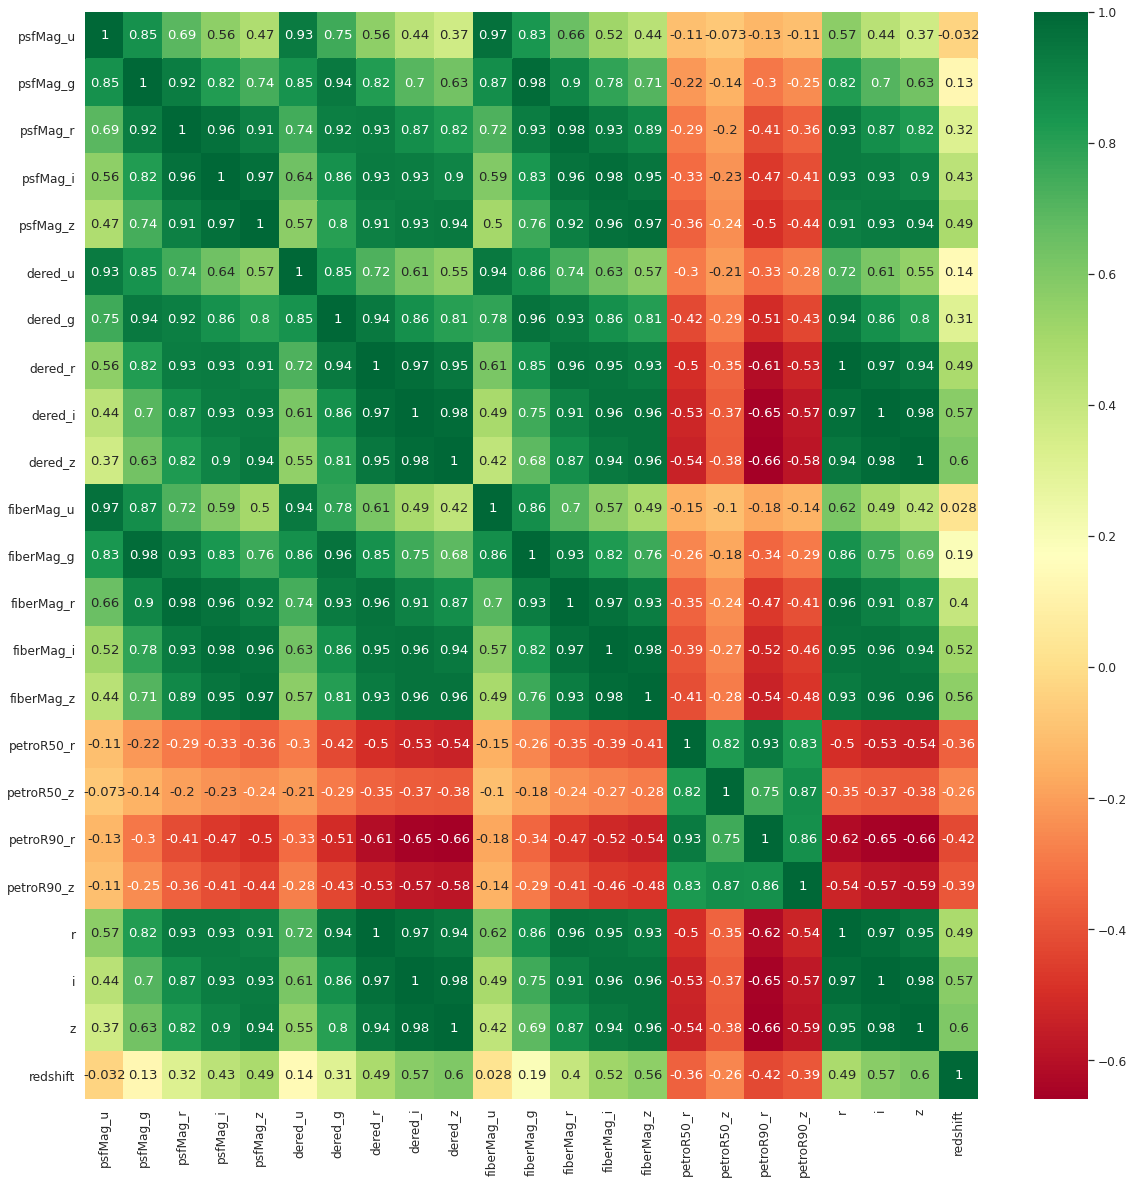

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


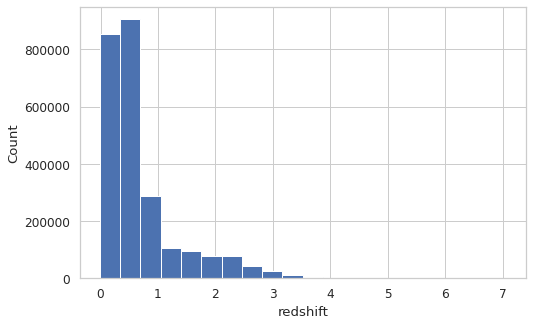

In [ ]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['redshift'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='redshift', ylabel='Count');

In [ ]:
inputCols=['psfMag_u','psfMag_g',
               'psfMag_r',
               'psfMag_i',
               'psfMag_z',
               'dered_u', 
               'dered_g', 
               'dered_r', 
               'dered_i', 
               'dered_z', 
               'fiberMag_u', 
               'fiberMag_g', 
               'fiberMag_r', 
               'fiberMag_i', 
               'fiberMag_z', 
               'petroR50_r', 
               'petroR50_z', 
               'petroR90_r', 
               'petroR90_z',
               'r', 
               'i', 
               'z']


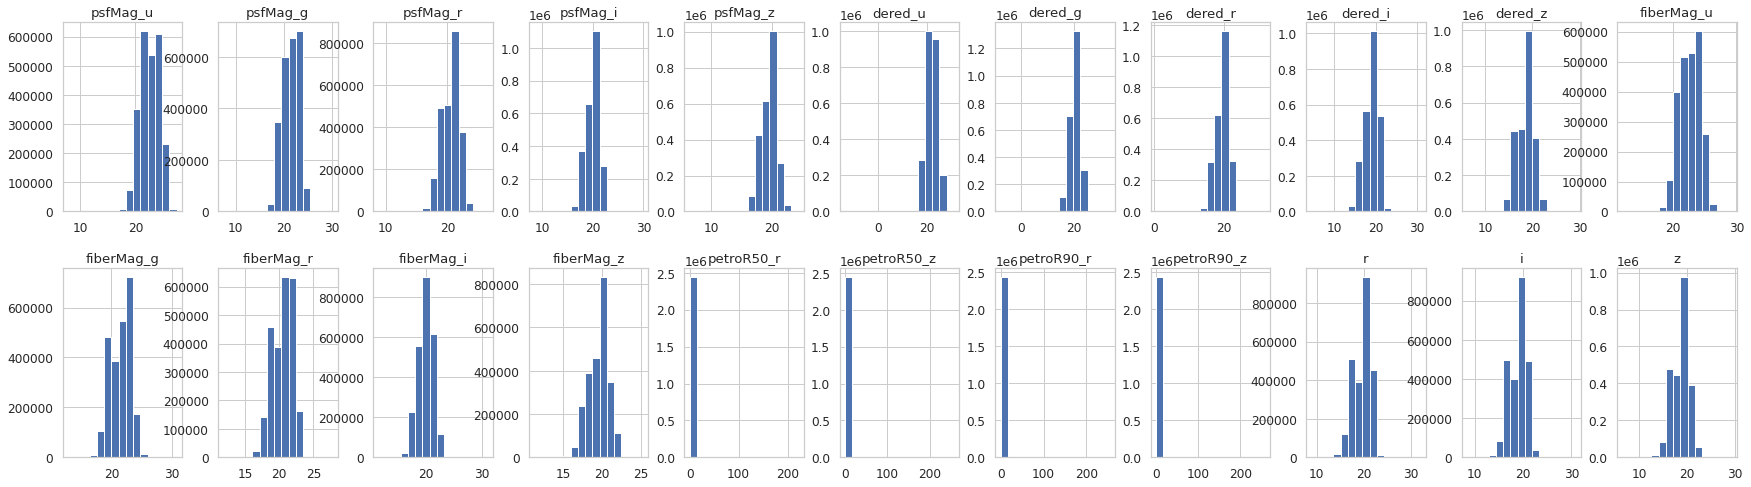

In [ ]:
df[inputCols].hist(bins=15, figsize=(30, 8),layout=(2, 11));

In [ ]:
df=df.drop(["objid","dec","ra"],axis=1)

In [ ]:
(df < 0).values.any()

True

In [ ]:
df[df["dered_u"]==-9999.0]=np.nan
df[df["dered_g"]==-9999.0]=np.nan
df[df["dered_r"]==-9999.0]=np.nan
df[df["dered_i"]==-9999.0]=np.nan
df[df["dered_z"]==-9999.0]=np.nan

df[df["fiberMag_u"]==-9999]=np.nan
df[df["fiberMag_g"]==-9999]=np.nan
df[df["fiberMag_r"]==-9999]=np.nan
df[df["fiberMag_i"]==-9999]=np.nan
df[df["fiberMag_z"]==-9999]=np.nan

df[df["r"]==-9999]=np.nan
df[df["i"]==-9999]=np.nan
df[df["z"]==-9999]=np.nan
df[df["petroR50_r"]==-9999]=np.nan
df[df["petroR90_r"]==-9999]=np.nan
df[df["petroR50_z"]==-9999]=np.nan
df[df["petroR90_z"]==-9999]=np.nan
df[df["psfMag_g"]==-9999.0]=np.nan
df[df["psfMag_r"]==-9999.0]=np.nan
df[df["psfMag_i"]==-9999.0]=np.nan
df[df["psfMag_z"]==-9999.0]=np.nan

In [ ]:
df=df.dropna()

In [ ]:
df.to_csv('Final_project_processed_data.csv')

In [ ]:
X = df.drop("redshift",axis=1)   #Feature Matrix
y = df["redshift"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred=reg_model.predict(x_test)


In [ ]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))


0.5384902417264184


In [ ]:
x_train.shape

(1953520, 22)

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
import time

start=time.process_time() 

history = model.fit(x_train, y_train, validation_split=0.33, epochs=20, batch_size=500, verbose=1)
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))

Epoch 1/20
2618/2618 [==============================] - 110s 42ms/step - loss: 2.1116 - mse: 2.1116 - val_loss: 0.1856 - val_mse: 0.1856
Epoch 2/20
2618/2618 [==============================] - 109s 41ms/step - loss: 0.2017 - mse: 0.2017 - val_loss: 0.2004 - val_mse: 0.2004
Epoch 3/20
2618/2618 [==============================] - 114s 44ms/step - loss: 0.1944 - mse: 0.1944 - val_loss: 0.2118 - val_mse: 0.2118
Epoch 4/20
2618/2618 [==============================] - 108s 41ms/step - loss: 0.1883 - mse: 0.1883 - val_loss: 0.1802 - val_mse: 0.1802
Epoch 5/20
2618/2618 [==============================] - 108s 41ms/step - loss: 0.1842 - mse: 0.1842 - val_loss: 0.1726 - val_mse: 0.1726
Epoch 6/20
2618/2618 [==============================] - 108s 41ms/step - loss: 0.1800 - mse: 0.1800 - val_loss: 0.1743 - val_mse: 0.1743
Epoch 7/20
2618/2618 [==============================] - 108s 41ms/step - loss: 0.1781 - mse: 0.1781 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 8/20
2618/2618 [===================

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

0.6899300176604257


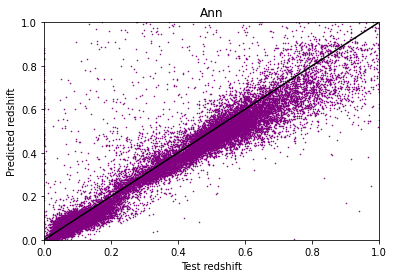

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Ann")
plt.scatter(y_test[:30000], y_pred[:30000], s=0.30, color="purple")
ax1.set_xlabel("Test redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,1], [0,1], '-r',color="black")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)    
plt.show()

In [ ]:
def plot_loss(hist):
  plt.plot(hist['loss'], label='loss')
  plt.plot(hist['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plot_loss(hist)

In [ ]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test,y_pred)) 

0.16737415450165344


In [ ]:
print(metrics.mean_squared_error(y_test,y_pred)) 

0.1657411532943218


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.4071131946944508
